In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
warnings.filterwarnings('ignore')

In [80]:
data=pd.read_csv('winequality-red.csv')

In [81]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [82]:
data.shape

(1599, 12)

In [83]:
duplicate=data.duplicated()
print(duplicate.sum())
data[duplicate]

240


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [84]:
data.drop_duplicates(inplace=True)

In [85]:
data.shape

(1359, 12)

In [86]:
#rename the columns names
new_df=data.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','chlorides':'chlorides','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'},inplace=True)
new_df=data

In [87]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [10]:
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
data.shape

(1359, 12)

no null values are present in the data set,data set is pretty clear from null values 

<AxesSubplot:>

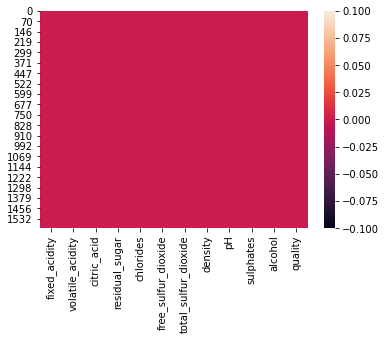

In [12]:
sns.heatmap(data.isnull()) #checking null values by heatmap,there is no null values present in the data set,the data set is pretty clear from null values

In [13]:
data.value_counts('quality')

quality
5    577
6    535
7    167
4     53
8     17
3     10
dtype: int64

there are 6 categories present in the target and also most of the data related to 5,6,7.

<AxesSubplot:xlabel='quality', ylabel='count'>

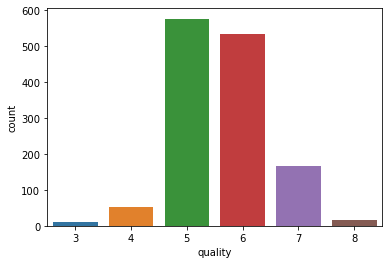

In [14]:
#target feature has multiple categories and they looks like imbalanced let's plot the count plot to verify is it balanced or not
sns.countplot(data['quality'])

from the above plot there are mainly 3 categories are accuring most so the target is imbalanced, 
we have to balance the target variable by using SMOTE technique.


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1359 non-null   float64
 1   volatile_acidity      1359 non-null   float64
 2   citric_acid           1359 non-null   float64
 3   residual_sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free_sulfur_dioxide   1359 non-null   float64
 6   total_sulfur_dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 170.3 KB


every thing in the form of numerical data we need not to convert  

In [16]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


some of the features contains outliers such as residual sugar contains outliers max value is much differ from 75% so it has outliers and free sulfur dioxide,total sulfer dioxide also contains outliers 

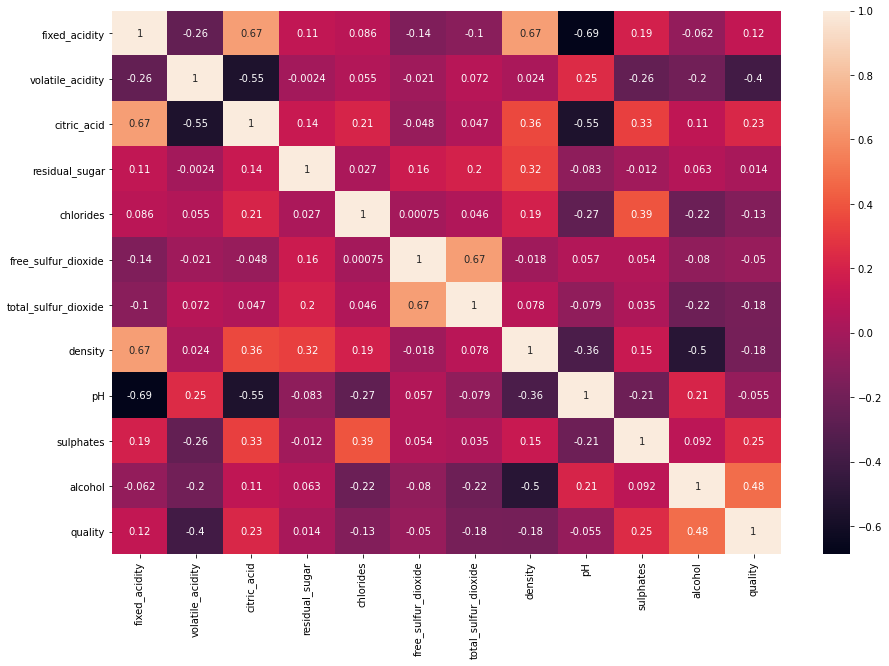

In [17]:
#checking correlation
plt.figure(figsize=(15,10))

sns.heatmap(data.corr(),annot=True)
plt.show()

In [18]:
data.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric_acid             0.228057
fixed_acidity           0.119024
residual_sugar          0.013640
free_sulfur_dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total_sulfur_dioxide   -0.177855
density                -0.184252
volatile_acidity       -0.395214
Name: quality, dtype: float64

free_sulfur_dioxide and total_sulfur_dioxide both are correlated each other, both are giving same information so we have to remove one of the feature between these two.
compared to correlation with the label total_sulfur_dioxide is more correlated, so we remove the free_sulfur_dioxide

pH,fixed_acidity and density are corelated each other so we remove one or two features of them, comparing to fixed_acidity and density pH is less corelated with the feature so we removed pH feature as well 

In [88]:
data['quality_dum']=[1 if x>=7 else 0 for x in data.quality]
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_dum
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


In [227]:
#dividing features and label as x and y
x=data.drop(columns=['quality','quality_dum'])
y=data['quality_dum']

In [228]:
#selecting best features 
from sklearn.feature_selection import SelectKBest,f_classif
best_features=SelectKBest(score_func=f_classif,k=8)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
#concatenate ataframe because scres and columns are in defferent dataframes 
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_name','score'] #heading for the output
print(feature_scores.nlargest(8,'score'))#largest 8 features 

            Feature_name       score
10               alcohol  274.086403
1       volatile_acidity  104.454520
2            citric_acid   58.660865
9              sulphates   57.459267
7                density   34.767118
6   total_sulfur_dioxide   25.525127
0          fixed_acidity   18.547729
4              chlorides   12.837335


In [229]:
#assigning column names  
x_new=data[['alcohol','volatile_acidity','total_sulfur_dioxide','sulphates','citric_acid','density','chlorides','fixed_acidity']]


In [230]:
x_new.shape

(1359, 8)

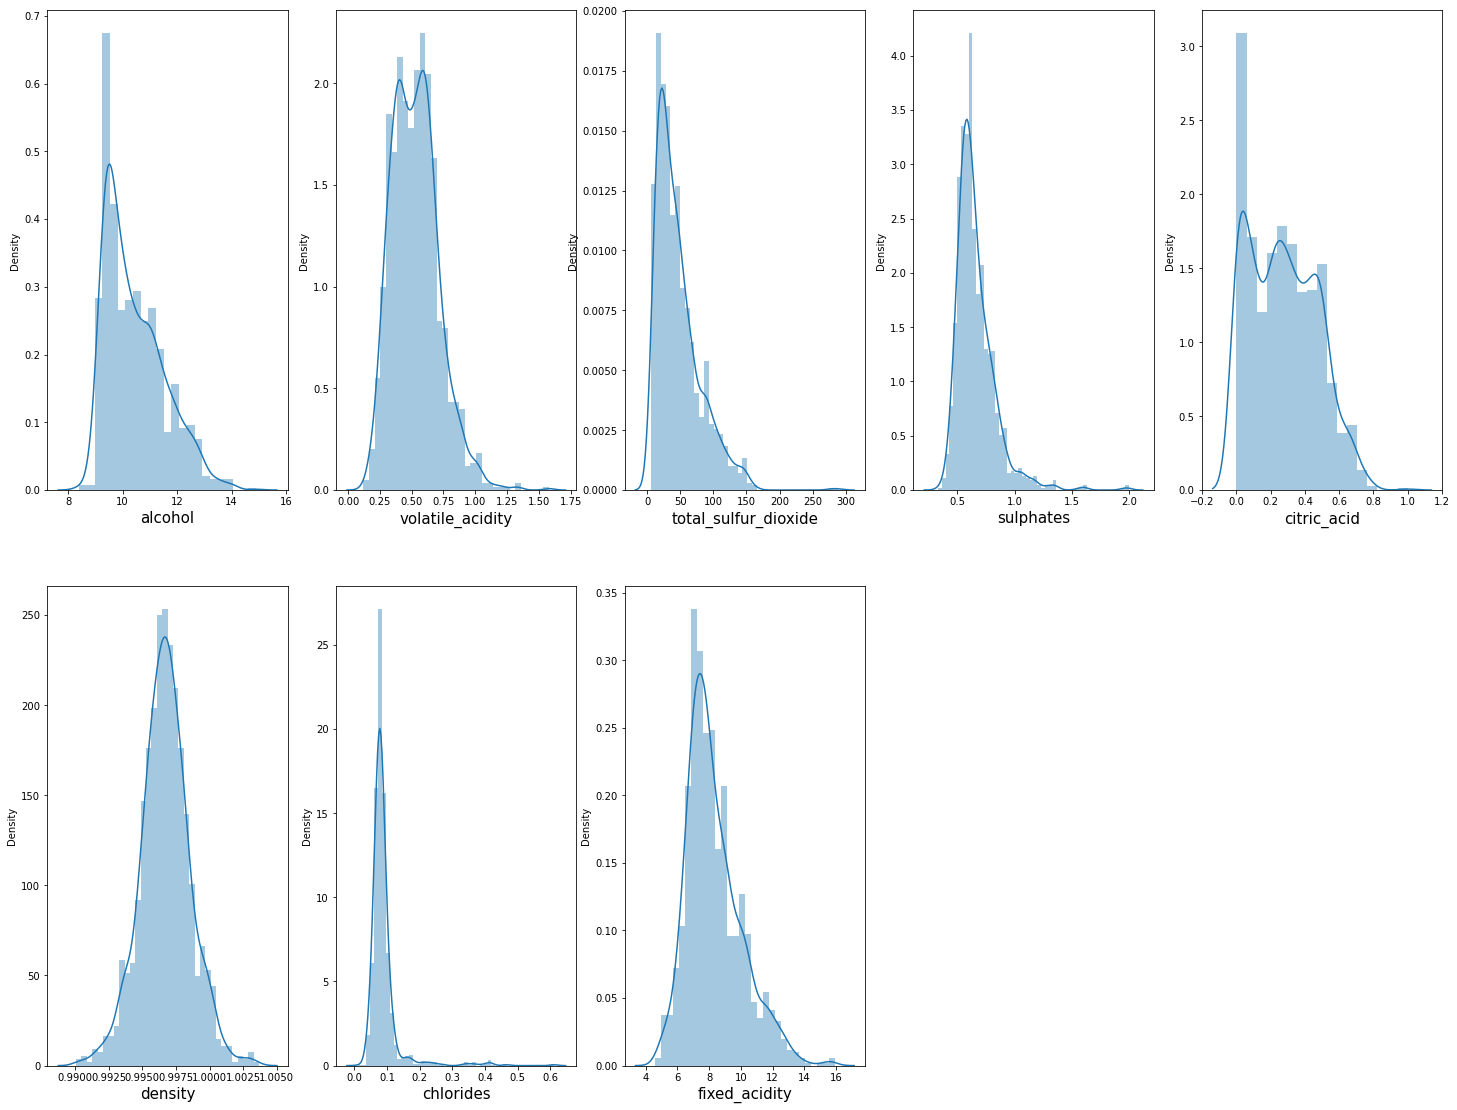

In [152]:
plt.figure(figsize=(25,30))
plotnumber=1
for column in x_new:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(x_new[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

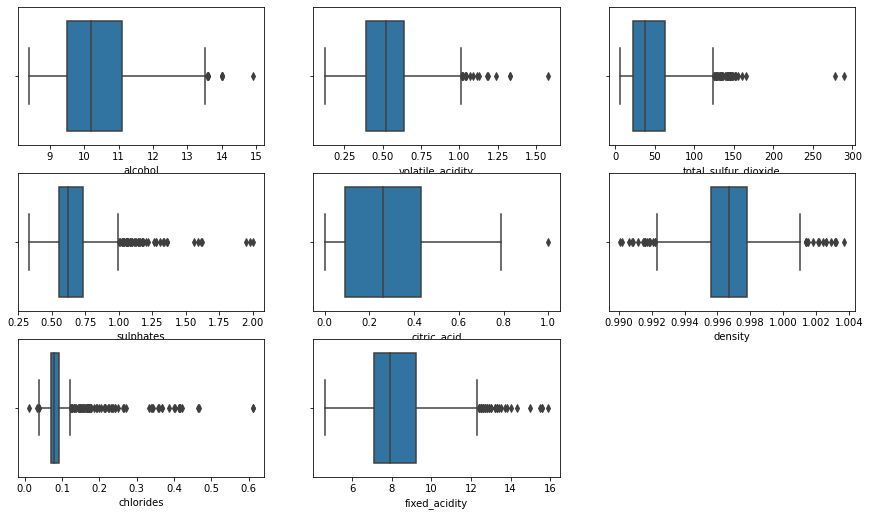

In [153]:
plt.figure(figsize=(15,30))
graph=1

for column in x_new:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(x_new[column])
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [154]:
x_new.skew()

alcohol                 0.859841
volatile_acidity        0.729279
total_sulfur_dioxide    1.540368
sulphates               2.406505
citric_acid             0.312726
density                 0.044778
chlorides               5.502487
fixed_acidity           0.941041
dtype: float64

In [155]:
from imblearn.over_sampling import SMOTE

In [231]:
sm=SMOTE()
x,y=sm.fit_resample(x_new,y)

In [232]:
y.value_counts()

0    1175
1    1175
Name: quality_dum, dtype: int64

<AxesSubplot:xlabel='quality_dum', ylabel='count'>

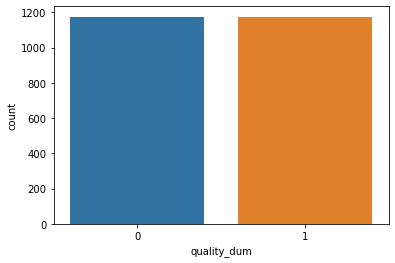

In [243]:
sns.countplot(y)

the target is balanced 

In [233]:
x.shape

(2350, 8)

In [159]:
#IQR
q1=data.quantile(0.25) #1st quantile

q3=data.quantile(0.75) #3rd quantile

#IQR
iqr=q3-q1

In [160]:
#fixed acidity have outliers in the upper side only 
fixed_high=(q3.fixed_acidity+(1.5*iqr.fixed_acidity))
print(fixed_high,'all are outliers')

12.349999999999998 all are outliers


In [161]:
index=np.where(x_new['fixed_acidity']>fixed_high)
index

(array([ 182,  214,  232,  255,  285,  294,  295,  302,  308,  314,  318,
         319,  328,  334,  344,  357,  375,  383,  385,  389,  411,  413,
         444,  445,  449,  467,  473,  477,  483,  485,  486,  487,  517,
         520,  522,  531,  565,  588,  701,  704, 1042], dtype=int64),)

In [162]:
x_new.drop(x_new.index[index],inplace=True)
x_new.shape

(1318, 8)

In [163]:
#volatile_acidity has outliers upperside only
volatile_high=(q3.volatile_acidity+(1.5*iqr.volatile_acidity))
print(volatile_high,'all are outliers')

index=np.where(x_new['volatile_acidity']>volatile_high)
print(index)

x_new.drop(x_new.index[index],inplace=True)
print('shape of the data after removing outiliers',x_new.shape)

1.0150000000000001 all are outliers
(array([  35,   86,  109,  114,  115,  121,  176,  454,  545,  559,  568,
        572,  577,  589,  731, 1033, 1065, 1076, 1203], dtype=int64),)
shape of the data after removing outiliers (1299, 8)


In [164]:
citric_high=(q3.citric_acid+(1.5*iqr.citric_acid))
print(citric_high,'all are outliers')

index=np.where(x_new['citric_acid']>citric_high)
print(index)

x_new.drop(x_new.index[index],inplace=True)
print('shape of the data after removing outiliers',x_new.shape)

0.94 all are outliers
(array([129], dtype=int64),)
shape of the data after removing outiliers (1298, 8)


In [165]:
chloride_high=(q3.chlorides+(1.5*iqr.chlorides))
print(chloride_high,'all are outliers')

index=np.where(x_new['chlorides']>chloride_high)
print(index)

x_new.drop(x_new.index[index],inplace=True)
print('shape of the data after removing outiliers',x_new.shape)

0.12249999999999998 all are outliers
(array([  12,   13,   15,   17,   37,   74,   76,   94,  110,  125,  143,
        152,  193,  202,  216,  234,  241,  252,  256,  257,  278,  302,
        308,  333,  362,  365,  392,  393,  414,  417,  442,  450,  451,
        489,  498,  509,  531,  548,  550,  579,  599,  615,  616,  618,
        619,  622,  634,  635,  645,  663,  664,  704,  724,  729,  812,
        839,  878,  887,  921,  938,  960,  962,  972,  983, 1009, 1015,
       1016, 1063, 1074, 1091, 1102, 1103, 1105, 1146, 1156, 1157, 1189,
       1264, 1271], dtype=int64),)
shape of the data after removing outiliers (1219, 8)


In [166]:
chloride_low=(q1.chlorides-(1.5*iqr.chlorides))
print(chloride_low,'all are outliers')

index=np.where(x_new['chlorides']<chloride_low)
print(index)

x_new.drop(x_new.index[index],inplace=True)
print('shape of the data after removing outiliers',x_new.shape)

0.03850000000000002 all are outliers
(array([ 514,  588,  616, 1193], dtype=int64),)
shape of the data after removing outiliers (1215, 8)


In [167]:
dioxide_high=(q3.total_sulfur_dioxide+(1.5*iqr.total_sulfur_dioxide))
print(dioxide_high,'all are outliers')

index=np.where(x_new['total_sulfur_dioxide']>dioxide_high)
print(index)

x_new.drop(x_new.index[index],inplace=True)
print('shape of the data after removing outiliers',x_new.shape)

124.5 all are outliers
(array([  72,   74,   76,   77,   89,  104,  114,  120,  121,  147,  148,
        149,  151,  158,  174,  241,  271,  315,  350,  387,  392,  393,
        439,  472,  473,  481,  483,  507,  513,  534,  548,  571,  572,
        583,  803,  805,  846,  936, 1052, 1067, 1125, 1184], dtype=int64),)
shape of the data after removing outiliers (1173, 8)


In [168]:
density_high=(q3.density+(1.5*iqr.density))
print(density_high,'all are outliers')

index=np.where(x_new['density']>density_high)
print(index)

x_new.drop(x_new.index[index],inplace=True)
print('shape of the data after removing outiliers',x_new.shape)

1.00115 all are outliers
(array([234, 345, 428, 620], dtype=int64),)
shape of the data after removing outiliers (1169, 8)


In [169]:
density_low=(q1.density-(1.5*iqr.density))
print(density_low,'all are outliers')

index=np.where(x_new['density']<density_low)
print(index)

x_new.drop(x_new.index[index],inplace=True)
print('shape of the data after removing outiliers',x_new.shape)

0.99227 all are outliers
(array([ 106,  412,  567,  699,  715,  791,  797,  801,  881,  911,  912,
        935, 1066, 1067], dtype=int64),)
shape of the data after removing outiliers (1155, 8)


In [170]:
sulphate_high=(q3.sulphates+(1.5*iqr.sulphates))
print(sulphate_high,'all are outliers')

index=np.where(x_new['sulphates']>sulphate_high)
print(index)

x_new.drop(x_new.index[index],inplace=True)
print('shape of the data after removing outiliers',x_new.shape)

0.9999999999999999 all are outliers
(array([  11,   33,   67,  115,  242,  262,  265,  267,  341,  358,  359,
        361,  409,  444,  585,  821,  917,  972,  999, 1004], dtype=int64),)
shape of the data after removing outiliers (1135, 8)


In [171]:
alcohol_high=(q3.alcohol+(1.5*iqr.alcohol))
print(alcohol_high,'all are outliers')

index=np.where(x_new['alcohol']>alcohol_high)
print(index)

x_new.drop(x_new.index[index],inplace=True)
print('shape of the data after removing outiliers',x_new.shape)

13.5 all are outliers
(array([325, 783], dtype=int64),)
shape of the data after removing outiliers (1133, 8)


In [172]:
x_new.shape

(1133, 8)

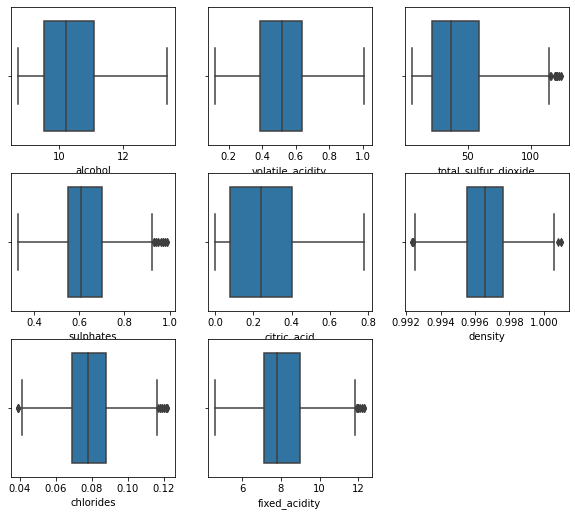

In [173]:
plt.figure(figsize=(10,30))
graph=1

for column in x_new:
    if graph<=20:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(x_new[column])
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [174]:
x_new.skew()

alcohol                 0.712023
volatile_acidity        0.284926
total_sulfur_dioxide    0.927614
sulphates               0.640303
citric_acid             0.335127
density                 0.017773
chlorides               0.226472
fixed_acidity           0.661343
dtype: float64

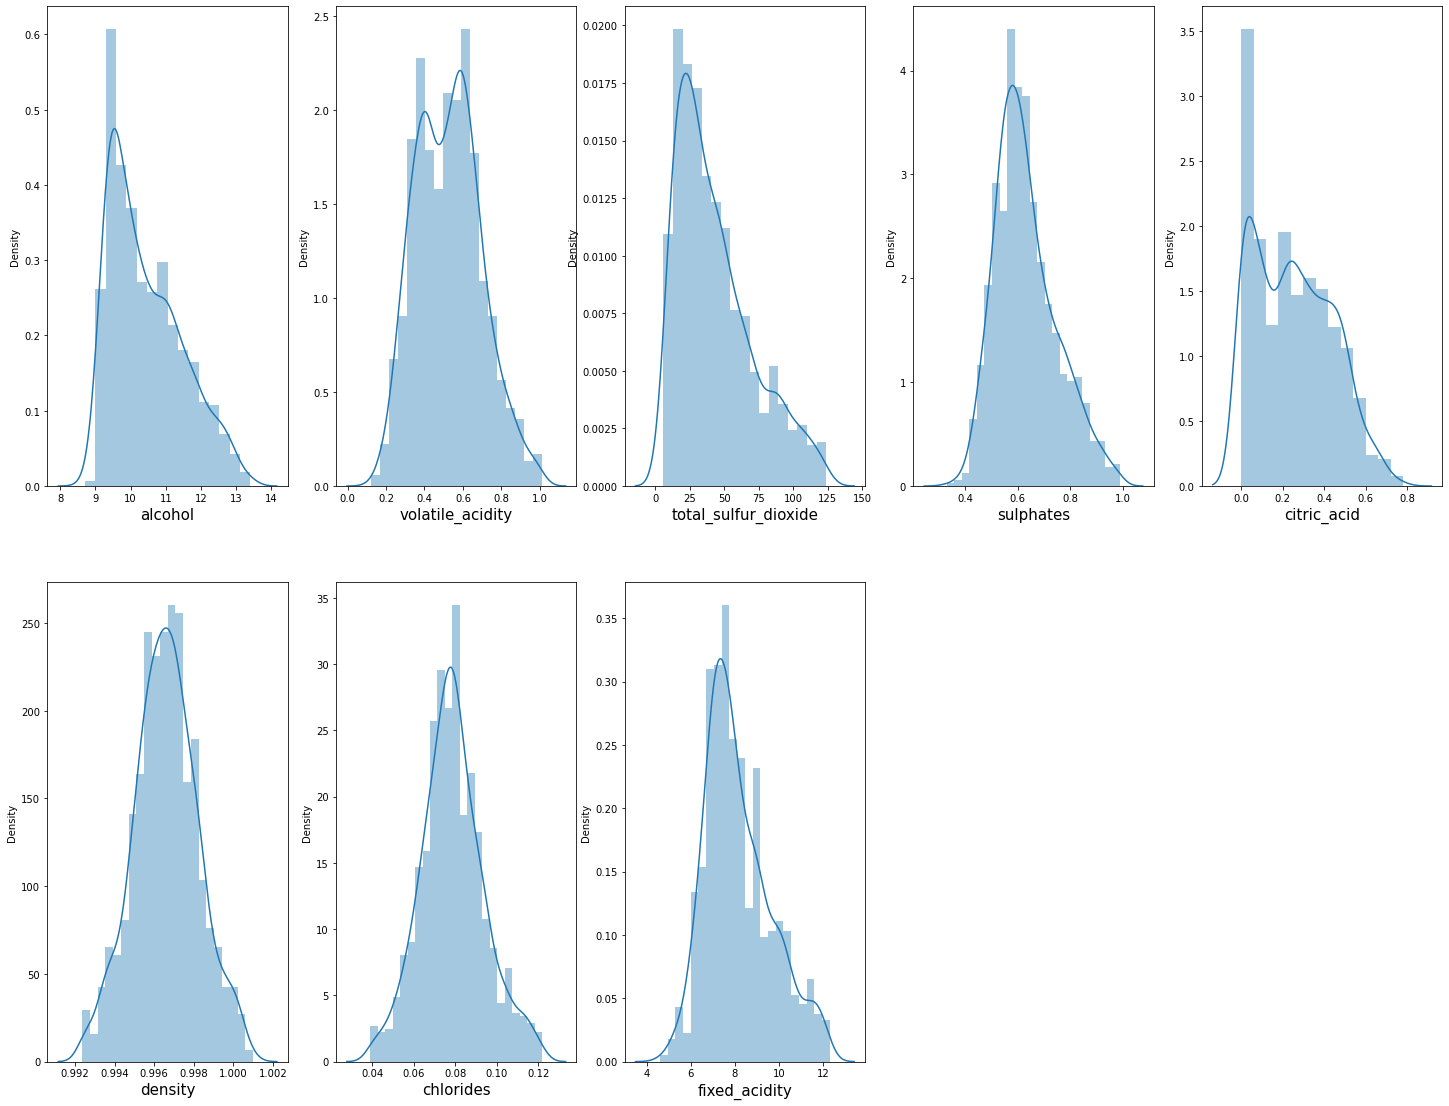

In [175]:
plt.figure(figsize=(25,30))
plotnumber=1
for column in x_new:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(x_new[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [ ]:
above plot shows that the data is normally distributed and there is not much skewed data present so we move furthur steps 

In [177]:
#scaling the data by using minmax scaler it adjusts the data is between 0 and 1
from sklearn.preprocessing import MinMaxScaler

In [194]:
scaler=MinMaxScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x))
x_scaled.head()


,0,1,2,3,4,5,6,7
0,0.153846,0.397260,0.098940,0.137725,0.00,0.567548,0.106845,0.247788
1,0.215385,0.520548,0.215548,0.209581,0.00,0.494126,0.143573,0.283186
2,0.215385,0.438356,0.169611,0.191617,0.04,0.508811,0.133556,0.283186
3,0.215385,0.109589,0.190813,0.149701,0.56,0.582232,0.105175,0.584071
4,0.153846,0.369863,0.120141,0.137725,0.00,0.567548,0.105175,0.247788


In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [196]:
#finding best random state 
MaxAccu=0
MaxRS=0

for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predx=lr.predict(x_test)
    acc=accuracy_score(y_test,predx)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print('best accuracy',MaxAccu,'on random state',MaxRS)

best accuracy 0.8486394557823129 on random state 86


In [197]:
#splitting train and test 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=86,test_size=0.25)

In [213]:
#LOGISTICREGRESSION
lr=LogisticRegression()
lr.fit(x_train,y_train)
predx=lr.predict(x_test)
print('accuracy',accuracy_score(y_test,predx))
print(confusion_matrix(y_test,predx))
print(classification_report(y_test,predx))


from sklearn.model_selection import cross_val_score
#cross validation score on logistic regression
scr=cross_val_score(lr,x,y, cv=10)
print('cross validation score of logistic regression is',scr.mean())

accuracy 0.8486394557823129
[[256  54]
 [ 35 243]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       310
           1       0.82      0.87      0.85       278

    accuracy                           0.85       588
   macro avg       0.85      0.85      0.85       588
weighted avg       0.85      0.85      0.85       588

cross validation score of logistic regression is 0.8114893617021275


In [214]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predx=knn.predict(x_test)
print('accuracy',accuracy_score(y_test,predx))
print(confusion_matrix(y_test,predx))
print(classification_report(y_test,predx))

#cross validation score on KNeighborsClassifier
scr=cross_val_score(knn,x,y, cv=10)
print('cross validation score of KNeighborsClassifier is',scr.mean())

accuracy 0.8554421768707483
[[239  71]
 [ 14 264]]
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       310
           1       0.79      0.95      0.86       278

    accuracy                           0.86       588
   macro avg       0.87      0.86      0.86       588
weighted avg       0.87      0.86      0.85       588

cross validation score of KNeighborsClassifier is 0.8472340425531917


In [215]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
predx=dt.predict(x_test)
print('accuracy',accuracy_score(y_test,predx))
print(confusion_matrix(y_test,predx))
print(classification_report(y_test,predx))


#cross validation score on decision tree classifier
scr=cross_val_score(dt,x,y, cv=10)
print('cross validation score of decision tree classifier is',scr.mean())

accuracy 0.858843537414966
[[262  48]
 [ 35 243]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       310
           1       0.84      0.87      0.85       278

    accuracy                           0.86       588
   macro avg       0.86      0.86      0.86       588
weighted avg       0.86      0.86      0.86       588

cross validation score of decision tree classifier is 0.8617021276595744


In [216]:
#RandomForestClassiffier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predx=rfc.predict(x_test)
print('accuracy',accuracy_score(y_test,predx))
print(confusion_matrix(y_test,predx))
print(classification_report(y_test,predx))

#cross validation score on random forestclassifier
scr=cross_val_score(rfc,x,y, cv=10)
print('cross validation score of random forestclassifier is',scr.mean())

accuracy 0.9149659863945578
[[276  34]
 [ 16 262]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       310
           1       0.89      0.94      0.91       278

    accuracy                           0.91       588
   macro avg       0.92      0.92      0.91       588
weighted avg       0.92      0.91      0.92       588

cross validation score of random forestclassifier is 0.8995744680851063


In [217]:
#SVC
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predx=svc.predict(x_test)
print('accuracy',accuracy_score(y_test,predx))
print(confusion_matrix(y_test,predx))
print(classification_report(y_test,predx))

#cross validation score on SVC
scr=cross_val_score(svc,x,y, cv=10)
print('cross validation score of SVC is',scr.mean())

accuracy 0.7261904761904762
[[207 103]
 [ 58 220]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       310
           1       0.68      0.79      0.73       278

    accuracy                           0.73       588
   macro avg       0.73      0.73      0.73       588
weighted avg       0.73      0.73      0.73       588

cross validation score of SVC is 0.7302127659574469


# plotting ROC AUC Curve

In [218]:
from sklearn.metrics import roc_curve,roc_auc_score


In [234]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=86,test_size=0.25)

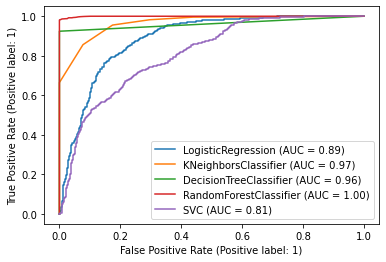

In [238]:
###how well our model works on training data
disp=plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(dt,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

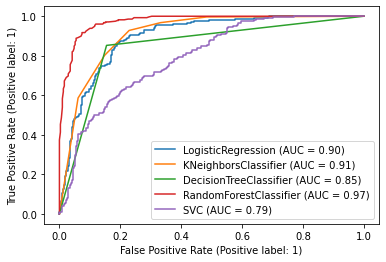

In [239]:
#lets see how well our model works on test data
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

# random forest classifier performs better among all so we will continue with the random forest

In [240]:
#Hyper parameter tunning
from sklearn.model_selection import GridSearchCV
#creating parameters list to pass in GridSearchCV
parameters= {'max_features':['auto','sqrt','log2'],
              'max_depth':[5,7,9,11,13,6,8],
              'criterion':['gini','entropy']}

In [241]:
Grdcv=GridSearchCV(RandomForestClassifier(),parameters,cv=10,scoring='accuracy')
Grdcv.fit(x_train,y_train)
Grdcv.best_params_

{'criterion': 'gini', 'max_depth': 13, 'max_features': 'auto'}

In [242]:
Grdcv_pred=Grdcv.best_estimator_.predict(x_test)#predicrting with best parameters
accuracy_score(y_test,Grdcv_pred)

0.9132653061224489

by using hyper parameter tunning the accuracy is increased .3%